# Practice pandas with exercises from:[pandas-exercises](https://github.com/guipsamora/pandas_exercises)

## Intro to data

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# Number of dataset
chipo.shape[0]

4622

In [5]:
# Number of columns
chipo.shape[1]

5

In [6]:
# Column headers
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [7]:
# Dataset indexed
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [8]:
# Most ordered and it's quantity
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [9]:
# Most ordered item in Choice_description
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [10]:
# Total Items ordered 
total_items = chipo.quantity.sum()
total_items

4972

In [11]:
# Price into a float
chipo.item_price.dtype

dtype('O')

In [12]:
dollarizer = lambda x: float(x[1:])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [13]:
chipo.item_price.dtype

dtype('float64')

In [14]:
# Revenue
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue, 2)))

Revenue was: $39237.02


In [15]:
# Amount of orders
orders = chipo.order_id.value_counts().count()
orders

1834

In [16]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
# Average revenue
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [17]:
# How many items are sold
chipo.item_name.value_counts().count()

50

In [18]:
#  Data From https://www.kaggle.com/openfoodfacts/world-food-facts/data
food = pd.read_csv('en.openfoodfacts.org.products.tsv',sep='\t')

/home/raul/miniconda3/envs/learning-pandas/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
food.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# shape is a tuple
food.shape[0]

356027

In [21]:
food.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [22]:
food.columns[104]

'-glucose_100g'

In [23]:
food.index

RangeIndex(start=0, stop=356027, step=1)

In [24]:
food.values[18][7]

'Lotus Organic Brown Jasmine Rice'

In [25]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|', index_col='user_id')

In [26]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [27]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


In [28]:
users.shape[0]

943

In [29]:
users.shape[1]

4

In [30]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [31]:
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [32]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [33]:
dict(users.dtypes)

{'age': dtype('int64'),
 'gender': dtype('O'),
 'occupation': dtype('O'),
 'zip_code': dtype('O')}

In [34]:
users.occupation

user_id
1         technician
2              other
3             writer
4         technician
5              other
6          executive
7      administrator
8      administrator
9            student
10            lawyer
11             other
12             other
13          educator
14         scientist
15          educator
16     entertainment
17        programmer
18             other
19         librarian
20         homemaker
21            writer
22            writer
23            artist
24            artist
25          engineer
26          engineer
27         librarian
28            writer
29        programmer
30           student
           ...      
914            other
915    entertainment
916         engineer
917          student
918        scientist
919            other
920           artist
921          student
922    administrator
923          student
924            other
925         salesman
926    entertainment
927       programmer
928          student
929        scientist
930  

In [35]:
# How meny different occupations there are
users.occupation.nunique()

21

In [36]:
# Top occupations
users.occupation.value_counts().head()

student          196
other            105
educator          95
administrator     79
engineer          67
Name: occupation, dtype: int64

In [37]:
# summarize the DF (By default, only the numeric columns are returned)
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [38]:
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [39]:
users.describe(include="all")

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [40]:
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

In [41]:
# Mean age
round(users.age.mean())

34.0

In [42]:
# Least occurred ages
users.age.value_counts().tail()

11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

## Filtering and Sorting

In [43]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')

In [44]:
prices = [float(value[1:]) for value in chipo.item_price]

In [45]:
chipo.item_price = prices

In [46]:
# Remove duplicates and apply the changed DF to new variable
chipo_filtered = chipo.drop_duplicates(['item_name','quantity'])
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]
chipo_one_prod[chipo_one_prod['item_price']>10].item_name.nunique()

12

In [47]:
chipo[(chipo['item_name'] == 'Chicken Bowl') & (chipo['quantity']==1)]

,order_id,quantity,item_name,choice_description,item_price
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
76,34,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",8.75
78,34,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
99,44,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",8.75
110,49,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
123,54,1,Chicken Bowl,"[Fresh Tomato Salsa, [Guacamole, Cheese, Sour ...",11.25


In [48]:
chipo.item_name.sort_values()

3389    6 Pack Soft Drink
341     6 Pack Soft Drink
1849    6 Pack Soft Drink
1860    6 Pack Soft Drink
2713    6 Pack Soft Drink
3422    6 Pack Soft Drink
553     6 Pack Soft Drink
1916    6 Pack Soft Drink
1922    6 Pack Soft Drink
1937    6 Pack Soft Drink
3836    6 Pack Soft Drink
298     6 Pack Soft Drink
1976    6 Pack Soft Drink
1167    6 Pack Soft Drink
3875    6 Pack Soft Drink
1124    6 Pack Soft Drink
3886    6 Pack Soft Drink
2108    6 Pack Soft Drink
3010    6 Pack Soft Drink
4535    6 Pack Soft Drink
4169    6 Pack Soft Drink
4174    6 Pack Soft Drink
4527    6 Pack Soft Drink
4522    6 Pack Soft Drink
3806    6 Pack Soft Drink
2389    6 Pack Soft Drink
3132    6 Pack Soft Drink
3141    6 Pack Soft Drink
639     6 Pack Soft Drink
1026    6 Pack Soft Drink
              ...        
2996         Veggie Salad
3163         Veggie Salad
4084         Veggie Salad
1694         Veggie Salad
2756         Veggie Salad
4201    Veggie Salad Bowl
1884    Veggie Salad Bowl
455     Vegg

In [49]:
chipo.sort_values(by='item_price',ascending=False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


In [50]:
chipo_salad = chipo[chipo.item_name == "Veggie Salad Bowl"]
len(chipo_salad)

18

In [51]:
chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") &(chipo.quantity > 1)]

In [52]:
len(chipo_drink_steak_bowl)

20

In [53]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv',sep=',')

In [54]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [55]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [56]:
euro12.shape[0]

16

In [57]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
Team                          16 non-null object
Goals                         16 non-null int64
Shots on target               16 non-null int64
Shots off target              16 non-null int64
Shooting Accuracy             16 non-null object
% Goals-to-shots              16 non-null object
Total shots (inc. Blocked)    16 non-null int64
Hit Woodwork                  16 non-null int64
Penalty goals                 16 non-null int64
Penalties not scored          16 non-null int64
Headed goals                  16 non-null int64
Passes                        16 non-null int64
Passes completed              16 non-null int64
Passing Accuracy              16 non-null object
Touches                       16 non-null int64
Crosses                       16 non-null int64
Dribbles                      16 non-null int64
Corners Taken                 16 non-null int64
Tackles                      

In [58]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]

In [59]:
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [60]:
discipline.sort_values(['Red Cards','Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [61]:
round(discipline['Yellow Cards'].mean())

7.0

In [62]:
euro12[euro12.Goals>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [63]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [64]:
euro12.iloc[: , :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [65]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [66]:
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# 

In [67]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

In [68]:
army = pd.DataFrame(raw_data, columns = ['regiment','company', 'deaths', 'battles', 'size','veterans','readiness','armored','deserters','origin'])

In [69]:
army = army.set_index('origin')

In [70]:
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2


In [71]:
army['veterans']

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

In [72]:
army[['veterans','deaths']]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


In [73]:
army.columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'readiness', 'armored', 'deserters'],
      dtype='object')

In [74]:
army.loc[['Maine','Alaska','Oregon'],['deaths','size','deserters']]

,deaths,size,deserters
origin,,,
Maine,43,1592,3
Alaska,523,987,24
Oregon,62,973,2


In [75]:
army.iloc[3:7, 3:6]

,battles,size,veterans
origin,,,
Florida,2,1400,26
Maine,4,1592,73
Iowa,7,1006,37
Alaska,8,987,949


In [76]:
army.iloc[3:]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [77]:
army.iloc[: , 4:7]

,size,veterans,readiness
origin,,,
Arizona,1045,1,1
California,957,5,2
Texas,1099,62,3
Florida,1400,26,3
Maine,1592,73,2
Iowa,1006,37,1
Alaska,987,949,2
Washington,849,48,3
Oregon,973,48,2


In [78]:
army[army['deaths'] > 50]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3


In [79]:
army[(army['deaths']>500) | (army['deaths'] < 50)]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [80]:
army[(army['regiment'] != 'Dragoons')]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [81]:
army.loc[['Arizona','Texas']]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31


In [82]:
army.loc[['Arizona'], ['deaths']]

,deaths
origin,
Arizona,523


In [83]:
army.loc['Texas','deaths']

25

## Grouping

In [84]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [85]:
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [86]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [87]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [88]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


In [89]:
drinks.groupby('continent').spirit_servings.agg(['mean','min','max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


In [90]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [91]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [92]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [93]:
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
users['gender_n'] = users['gender'].apply(gender_to_numeric)
a = users.groupby('occupation').gender_n.sum() / users.occupation.value_counts() * 100
a.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [94]:
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [95]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [96]:
gender_occup = users.groupby(['occupation','gender']).agg({'gender':'count'})

occup_count = users.groupby(['occupation']).agg('count')

occup_gender = gender_occup.div(occup_count, level = "occupation") * 100

occup_gender.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

In [97]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

In [98]:
regiment = pd.DataFrame(raw_data, columns= raw_data.keys())
regiment

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [99]:
regiment[regiment['regiment']=='Nighthawks'].groupby('regiment').mean()

,preTestScore,postTestScore
regiment,,
Nighthawks,15.25,59.5


In [100]:
regiment.groupby('company').describe()

preTestScore                                                      \
               count       mean        std  min   25%   50%    75%   max   
company                                                                    
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0   
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0   

        postTestScore                                                       
                count       mean        std   min    25%   50%   75%   max  
company                                                                     
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0  
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0

In [101]:
regiment.groupby('company').preTestScore.mean()

company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

In [102]:
regiment.groupby(['regiment','company']).preTestScore.mean()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

In [103]:
regiment.groupby(['regiment','company']).preTestScore.mean().unstack()

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


In [104]:
regiment.groupby(['regiment','company']).mean()

preTestScore  postTestScore
regiment   company                             
Dragoons   1st               3.5           47.5
           2nd              27.5           75.5
Nighthawks 1st              14.0           59.5
           2nd              16.5           59.5
Scouts     1st               2.5           66.0
           2nd               2.5           66.0

In [105]:
regiment.groupby(['company','regiment']).size()

company  regiment  
1st      Dragoons      2
         Nighthawks    2
         Scouts        2
2nd      Dragoons      2
         Nighthawks    2
         Scouts        2
dtype: int64

In [106]:
for name, group in regiment.groupby('regiment'):
    
    print('\n')
    print(name)
    print(group)



Dragoons
   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57


Nighthawks
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62


Scouts
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70


## Apply

In [107]:
csv_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
alcohol = pd.read_csv(csv_url)
alcohol.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [108]:
stud_alcoh = alcohol.loc[:,"school":"guardian"]
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


In [109]:
capitalizer = lambda x: x.capitalize()

In [110]:
stud_alcoh['Mjob'].apply(capitalizer)
stud_alcoh['Fjob'].apply(capitalizer)

0       Teacher
1         Other
2         Other
3      Services
4         Other
5         Other
6         Other
7       Teacher
8         Other
9         Other
10       Health
11        Other
12     Services
13        Other
14        Other
15        Other
16     Services
17        Other
18     Services
19        Other
20        Other
21       Health
22        Other
23        Other
24       Health
25     Services
26        Other
27     Services
28        Other
29      Teacher
         ...   
365       Other
366    Services
367    Services
368    Services
369     Teacher
370    Services
371    Services
372     At_home
373       Other
374       Other
375       Other
376       Other
377    Services
378       Other
379       Other
380     Teacher
381       Other
382    Services
383    Services
384       Other
385       Other
386     At_home
387       Other
388    Services
389       Other
390    Services
391    Services
392       Other
393       Other
394     At_home
Name: Fjob, Length: 395,

In [111]:
stud_alcoh.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father


In [112]:
stud_alcoh['Mjob'] = stud_alcoh['Mjob'].apply(capitalizer)
stud_alcoh['Fjob'] = stud_alcoh['Fjob'].apply(capitalizer)
stud_alcoh.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,Services,Services,course,other
391,MS,M,17,U,LE3,T,3,1,Services,Services,course,mother
392,MS,M,21,R,GT3,T,1,1,Other,Other,course,other
393,MS,M,18,R,LE3,T,3,2,Services,Other,course,mother
394,MS,M,19,U,LE3,T,1,1,Other,At_home,course,father


In [113]:
majority = lambda x : x > 17

In [114]:
stud_alcoh['legal_drinker'] = stud_alcoh['age'].apply(majority)

In [115]:
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


In [116]:
times10 = lambda x: 10*x if type(x) is int else x

In [117]:
stud_alcoh.applymap(times10).head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False
5,GP,M,160,U,LE3,T,40,30,Services,Other,reputation,mother,False
6,GP,M,160,U,LE3,T,20,20,Other,Other,home,mother,False
7,GP,F,170,U,GT3,A,40,40,Other,Teacher,home,mother,False
8,GP,M,150,U,LE3,A,30,20,Services,Other,home,mother,False
9,GP,M,150,U,GT3,T,30,40,Other,Other,home,mother,False


In [118]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [119]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.2 KB


In [120]:
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.2 KB


In [121]:
crime = crime.set_index('Year', drop = True)

In [122]:
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [123]:
del crime['Total']
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [124]:
crimes = crime.resample('10AS').sum()

In [125]:
population = crime['Population'].resample('10AS').max()

In [126]:
crimes['Population'] = population
crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [127]:
crimes.idxmax(0)

Population           2010-01-01
Violent              1990-01-01
Property             1990-01-01
Murder               1990-01-01
Forcible_Rape        1990-01-01
Robbery              1990-01-01
Aggravated_assault   1990-01-01
Burglary             1980-01-01
Larceny_Theft        1990-01-01
Vehicle_Theft        1990-01-01
dtype: datetime64[ns]

## Merge

In [128]:

cars1 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv")
cars2 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv")

print(cars1.head())
print(cars2.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8           307        130    3504          12.0     70   
1  15.0          8           350        165    3693          11.5     70   
2  18.0          8           318        150    3436          11.0     70   
3  16.0          8           304        150    3433          12.0     70   
4  17.0          8           302        140    3449          10.5     70   

   origin                        car  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0       1  chevrolet chevelle malibu         NaN          NaN          NaN   
1       1          buick skylark 320         NaN          NaN          NaN   
2       1         plymouth satellite         NaN          NaN          NaN   
3       1              amc rebel sst         NaN          NaN          NaN   
4       1                ford torino         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  
0          NaN          NaN  
1          NaN

In [129]:
cars1 = cars1.loc[:,'mpg':'car']

In [130]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


In [131]:
print(cars1.shape)
print(cars2.shape)

(198, 9)
(200, 9)


In [132]:
cars = cars1.append(cars2)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
5,15.0,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl


In [133]:
nr_owners = np.random.randint(15000,high=73001, size=398, dtype='l')
nr_owners

array([72818, 65288, 26408, 46209, 27764, 41477, 19917, 23070, 46513,
       40619, 17308, 23710, 16917, 72021, 56280, 67250, 72268, 44608,
       21833, 55956, 68283, 55370, 55565, 62731, 31942, 58579, 45802,
       33405, 61157, 37070, 48779, 59827, 37689, 58794, 30424, 40490,
       42554, 61286, 32253, 69615, 60354, 47568, 32509, 36183, 43429,
       61150, 70313, 18725, 31762, 26463, 69542, 32463, 34727, 35068,
       72617, 50094, 21472, 48443, 49593, 35023, 17980, 60615, 16894,
       17304, 33191, 61842, 52628, 39776, 69742, 22948, 47801, 33006,
       60801, 30862, 19928, 43838, 55699, 43893, 28826, 45651, 71707,
       49399, 36004, 31942, 17175, 48279, 56447, 17340, 70475, 33387,
       65647, 57502, 16483, 24660, 69746, 57282, 23042, 32800, 32894,
       25818, 62104, 64852, 31418, 53625, 57790, 52624, 44252, 43773,
       59156, 63270, 70882, 40115, 62251, 24994, 61902, 40905, 22778,
       72122, 64419, 57044, 43476, 69896, 43255, 38440, 53427, 47786,
       68037, 48168,

In [134]:
cars['owners'] = nr_owners

In [135]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,50920
196,44.0,4,97,52,2130,24.6,82,2,vw pickup,60111
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage,32371
198,28.0,4,120,79,2625,18.6,82,1,ford ranger,42484
199,31.0,4,119,82,2720,19.4,82,1,chevy s-10,69392


In [136]:

raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1,columns=['subject_id','first_name','last_name'])
data2 = pd.DataFrame(raw_data_2,columns=['subject_id','first_name','last_name'])
data3 = pd.DataFrame(raw_data_3,columns=['subject_id','test_id'])

In [137]:
print(data1.head(1))
print(data2.head(1))
print(data3.head(1))

  subject_id first_name last_name
0          1       Alex  Anderson
  subject_id first_name last_name
0          4      Billy    Bonder
  subject_id  test_id
0          1       51


In [138]:
all_data = pd.concat([data1,data2])

In [139]:
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [140]:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [141]:
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [142]:
# Merge only the data that has the same 'subject_id' on both data1 and data2
pd.merge(data1,data2, on='subject_id', how='inner')


,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [143]:
pd.merge(data1,data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [144]:
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

In [145]:
print(s1,s2,s3)

0     2
1     3
2     4
3     2
4     1
5     3
6     4
7     1
8     1
9     2
10    3
11    2
12    4
13    4
14    2
15    4
16    4
17    4
18    1
19    3
20    2
21    4
22    3
23    2
24    2
25    1
26    2
27    2
28    2
29    3
     ..
70    4
71    4
72    2
73    2
74    1
75    2
76    3
77    2
78    4
79    1
80    3
81    3
82    1
83    1
84    4
85    1
86    2
87    1
88    3
89    3
90    3
91    4
92    4
93    3
94    4
95    2
96    2
97    4
98    1
99    2
Length: 100, dtype: int64 0     1
1     3
2     4
3     2
4     4
5     3
6     4
7     1
8     1
9     3
10    2
11    3
12    4
13    4
14    1
15    1
16    4
17    4
18    4
19    3
20    1
21    4
22    4
23    3
24    2
25    4
26    2
27    2
28    3
29    1
     ..
70    1
71    1
72    2
73    3
74    4
75    3
76    1
77    4
78    1
79    2
80    1
81    4
82    1
83    3
84    2
85    3
86    3
87    2
88    1
89    2
90    1
91    3
92    1
93    3
94    1
95    4
96    2
97    3
98    4
99    

In [146]:
housemkt = pd.concat([s1, s2, s3], axis=1)

In [147]:
housemkt.head()

,0,1,2
0,2,1,10625
1,3,3,25964
2,4,4,18275
3,2,2,23442
4,1,4,25222


In [148]:
housemkt.rename(columns={0:'bedrs',1:'bathrs',2:'price_sqr_meter'},inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,2,1,10625
1,3,3,25964
2,4,4,18275
3,2,2,23442
4,1,4,25222


In [149]:
bigcolumn = pd.concat([s1,s2,s3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))
bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,2
1,3
2,4
3,2
4,1
5,3
6,4
7,1
8,1
9,2


In [150]:
bigcolumn.reset_index(drop=True,inplace=True)
bigcolumn

,0
0,2
1,3
2,4
3,2
4,1
5,3
6,4
7,1
8,1
9,2


## Stats

In [151]:
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [152]:
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [153]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [154]:
del baby_names['Unnamed: 0']

In [155]:
del baby_names['Id']
baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


In [156]:
# Compare gender counts
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [157]:
# Group names and assign it to variables to get the popular options
del baby_names['Year']
names = baby_names.groupby('Name').sum()
names.head()
print(names.shape)
names.sort_values("Count", ascending=0).head()

(17632, 1)


,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


In [158]:
# Count of different names
len(names)

17632

In [159]:
names.Count.idxmax()

'Jacob'

In [160]:
len(names[names.Count == names.Count.min()])

2578

In [161]:
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


In [162]:
# Standard Deviation
names.Count.std()

11006.06946789057

In [163]:
names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


In [164]:
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'

In [165]:
data = pd.read_csv(data_url, sep = '\s+', parse_dates = [[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [166]:
import datetime
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year,x.month,x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [167]:
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])

In [168]:
data = data.set_index('Yr_Mo_Dy')

In [169]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [170]:
# Hpow many values are missing for each location
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [171]:
# how many values are not missing
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [172]:
data.fillna(0).values.flatten().mean()

10.223864592840483

In [173]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [174]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1)
day_stats['mean'] = data.mean(axis = 1)
day_stats['std'] = data.std(axis = 1)
day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [175]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [176]:
# Yearly frequency
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [177]:
# Monthly frequency
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
1961-06,9.904138,8.520333,8.867000,6.083000,10.824000,6.707333,9.095667,8.849333,9.086667,9.940333,13.995000,14.553793
1961-07,10.614194,8.221613,9.110323,6.340968,10.532581,6.198387,8.353333,8.284194,8.077097,8.891613,11.092581,12.312903
1961-08,12.035000,10.133871,10.335806,6.845806,12.715161,8.441935,10.093871,10.460968,9.111613,10.544667,14.410000,14.345333
1961-09,12.531000,9.656897,10.776897,7.155517,11.003333,7.234000,8.206000,8.936552,7.728333,9.931333,13.718333,12.921667


In [178]:
# Weekly Frequency
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
1961-02-06/1961-02-12,19.684286,16.417143,17.304286,10.774286,14.718571,12.522857,14.934286,14.850000,14.064286,14.440000,21.832857,19.155714
1961-02-13/1961-02-19,15.130000,15.091429,13.797143,10.083333,13.410000,11.868571,9.542857,12.128571,12.375714,13.542857,21.167143,16.584286
1961-02-20/1961-02-26,15.221429,13.625714,14.334286,8.524286,13.655714,10.114286,11.150000,10.875714,10.392857,12.730000,16.304286,14.322857


In [179]:
# MIN, MAX, MEAN, STD for each week
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53],"RPT":"MAL"].head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

## Visualization

In [180]:
import collections
import matplotlib.pyplot as plt

In [181]:
%matplotlib inline

In [182]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')

In [183]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [184]:
# Histogram of the top 5 items

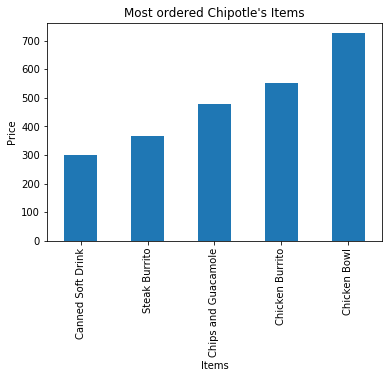

In [185]:
x = chipo.item_name
letter_counts = collections.Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df = df[0].sort_values(ascending = True)[45:50]
df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

plt.show()

(0, 36.70565598504241)

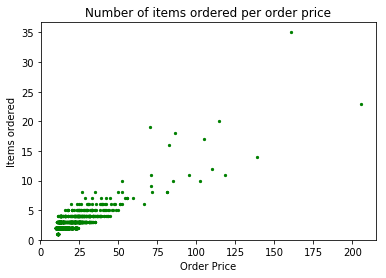

In [186]:
# a scatter plot of items ordered per order price
chipo.item_price = [float(value[1:]) for value in chipo.item_price]
orders = chipo.groupby('order_id').sum()
plt.scatter(x = orders.item_price, y = orders.quantity, s = 5, c = 'green')

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

In [187]:
import seaborn as sns

In [188]:
%matplotlib inline

In [189]:
sns.set(style="ticks")

In [190]:

path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


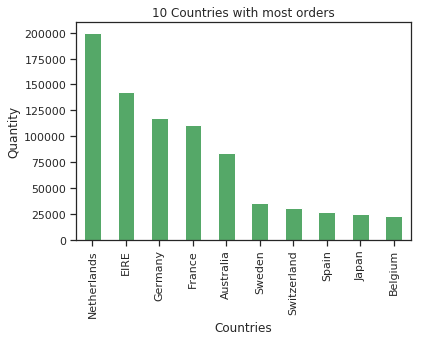

In [191]:
# create histogram
countries = online_rt.groupby('Country').sum()
countries = countries.sort_values(by = 'Quantity', ascending = False)[1:11]
countries['Quantity'].plot(kind='bar',color='G')

plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')
plt.show()

In [192]:
# exclude negative Quantity entries
online_rt = online_rt[online_rt.Quantity > 0]

In [193]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


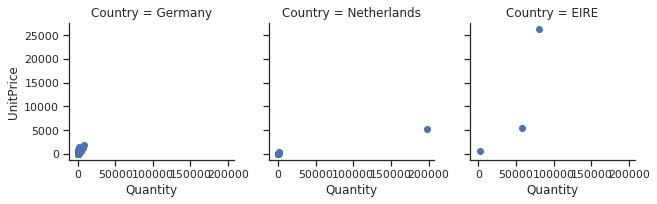

In [194]:
# scatterplot
customers = online_rt.groupby(['CustomerID','Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
top_countries = ['Netherlands', 'EIRE','Germany']
customers = customers[customers['Country'].isin(top_countries)]

#graph
g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice",alpha=1)
g.add_legend()

In [195]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4]
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [196]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [197]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID', 'Country'])

In [198]:
plottable = grouped['Quantity','Revenue'].agg(sum)
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


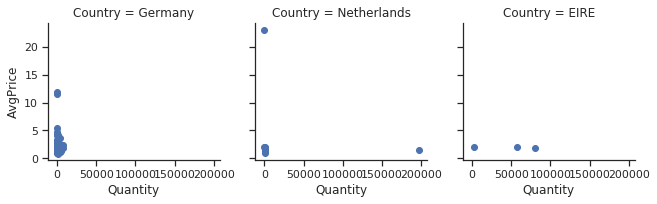

In [199]:
g = sns.FacetGrid(plottable, col='Country')
g.map(plt.scatter,'Quantity', 'AvgPrice', alpha=1)
g.add_legend()

[]

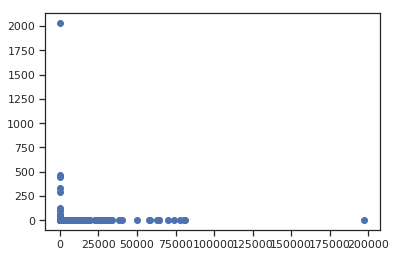

In [200]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()

[]

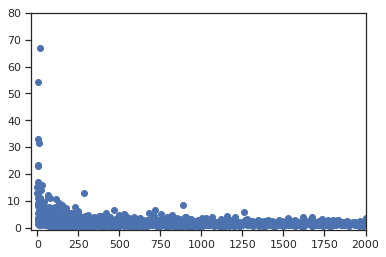

In [201]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity':'sum','Revenue':'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.xlim(-40,2000)
plt.ylim(-1, 80)
plt.plot()

In [202]:
price_start = 0
price_end = 50
price_interval = 1
buckets = np.arange(price_start, price_end, price_interval)

revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice,buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

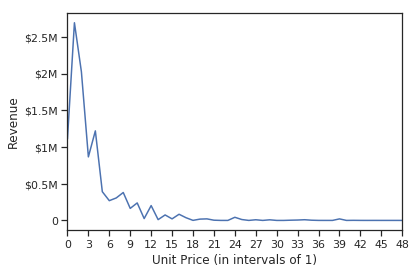

In [203]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of ' + str(price_interval) +')')
plt.ylabel('Revenue')

plt.xticks(np.arange(price_start,price_end,3),
          np.arange(price_start,price_end,3))
plt.yticks([0, 500000,1000000, 1500000, 2000000, 2500000],
          ['0','$0.5M','$1M','$1.5M','$2M','$2.5M'])
plt.show()

In [204]:
raw_data = {'first_name':['Jason','Molly','Tina','Jake','Amy'],
           'last_name':['Miller','Jacobson','Ali','Milner','Cooze'],
           'female':[0,1,1,0,1],
           'age':[42,52,36,24,73],
           'preTestScore':[4,24,31,2,3],
           'postTestScore':[25,94,57,62,70]
           }
df = pd.DataFrame(raw_data, columns =['first_name','last_name','age','female','preTestScore','postTestScore'])
df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


Text(0, 0.5, 'postTestScore')

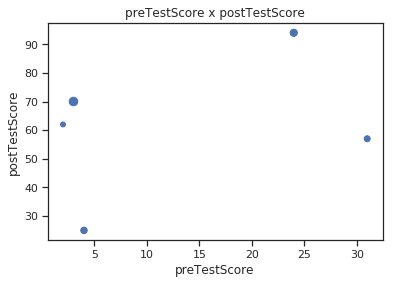

In [205]:
plt.scatter(df.preTestScore, df.postTestScore, s=df.age)

plt.title('preTestScore x postTestScore')
plt.xlabel('preTestScore')
plt.ylabel('postTestScore')

Text(0, 0.5, 'postTestScore')

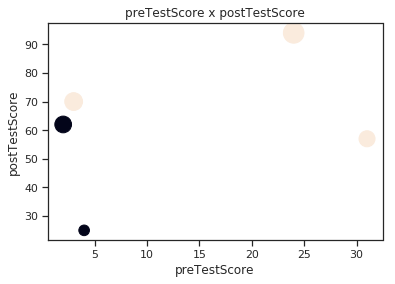

In [206]:
plt.scatter(df.preTestScore, df.postTestScore, s=df.postTestScore*4.5, c=df.female)

plt.title('preTestScore x postTestScore')
plt.xlabel('preTestScore')
plt.ylabel('postTestScore')

In [207]:
sns.set_style('white')

In [208]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)

tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [209]:
del tips['Unnamed: 0']
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


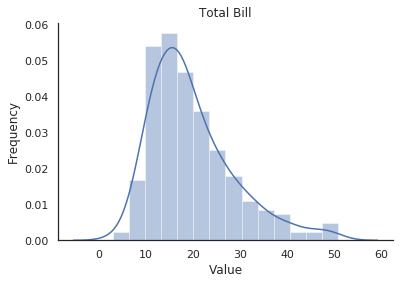

In [210]:
ttbill = sns.distplot(tips.total_bill)

ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title='Total Bill')
sns.despine()

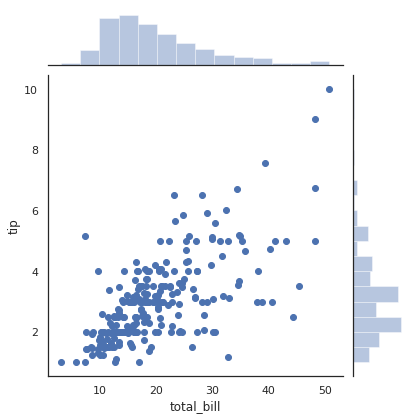

In [211]:
sns.jointplot(x='total_bill', y='tip', data=tips)

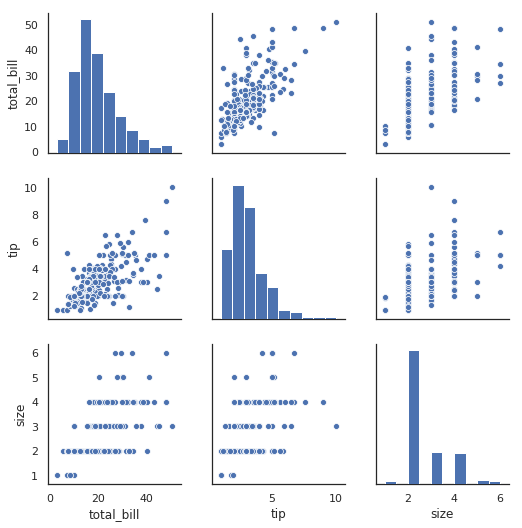

In [212]:
sns.pairplot(tips)

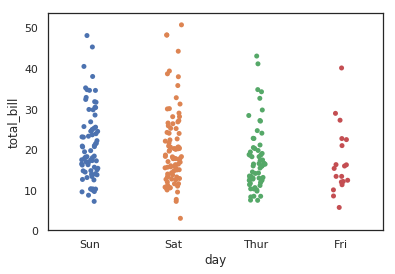

In [213]:
# strip plot
sns.stripplot(x='day',y='total_bill',data=tips, jitter =True)

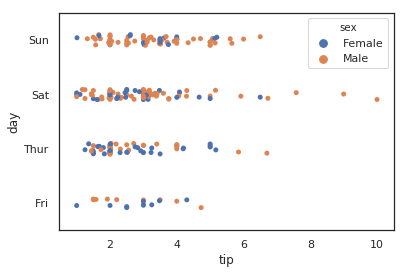

In [214]:
# strip plot
sns.stripplot(x='tip',y='day',hue='sex',data=tips, jitter=True)

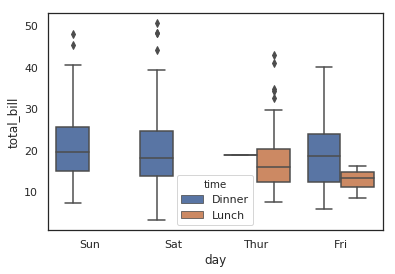

In [215]:
sns.boxplot(x='day',y='total_bill',hue='time',data=tips)

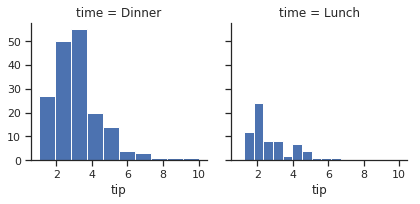

In [216]:
sns.set(style='ticks')
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist,'tip')

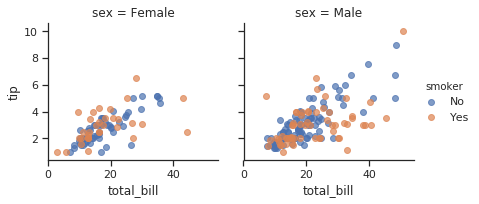

In [217]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter,'total_bill','tip',alpha=.7)
g.add_legend()

In [218]:
import pandas as pd
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

titanic = pd.read_csv(url)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


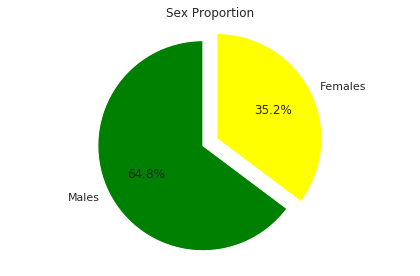

In [220]:
# pie chart
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

proportions = [males, females]

plt.pie(
    proportions,
    
    labels = ['Males','Females'],
    
    shadow = False,
    
    colors = ['green', 'yellow'],
    
    explode = (0.15, 0),
    
    startangle = 90,
    
    autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title('Sex Proportion')
plt.tight_layout()
plt.show()

(-5, 85)

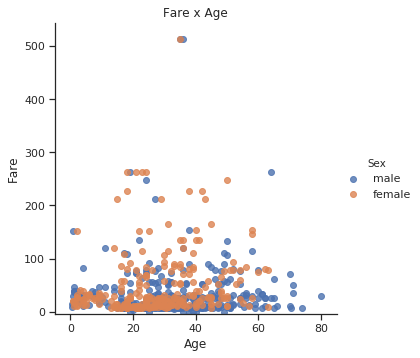

In [221]:
lm = sns.lmplot(x='Age', y='Fare', data = titanic, hue = 'Sex', fit_reg=False)
lm.set(title='Fare x Age')
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

In [222]:
titanic.Survived.sum()

342

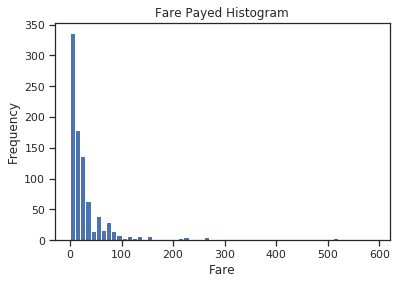

In [223]:
df = titanic.Fare.sort_values(ascending = False)
df

binsVal = np.arange(0,600,10)
binsVal

plt.hist(df, bins = binsVal)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histogram')
plt.show()

## Create series and DataFrames

In [224]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

In [225]:
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [226]:
pokemon = pokemon[['name','type','hp','evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [227]:
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


In [228]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

## Time Series

In [229]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [230]:
  apple.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [231]:
apple.Date = pd.to_datetime(apple.Date)

In [232]:
apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [233]:
apple = apple.set_index('Date')

In [234]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [235]:
apple.index.is_unique

True

In [236]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [237]:
apple_month = apple.resample('BM').mean()

In [238]:
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [239]:
(apple.index.max() - apple.index.min()).days

12261

In [240]:
apple_months = apple.resample('BM').mean()
len(apple_months.index)

404

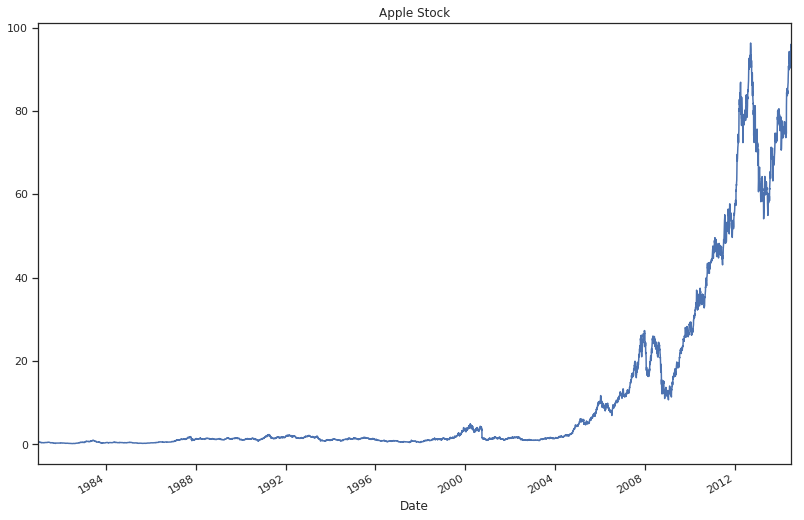

In [254]:
appl_open = apple['Adj Close'].plot(title='Apple Stock')

fig.set_size_inches(13.5, 9)

In [242]:
url = 'https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv'
df = pd.read_csv(url)
df.head(10)

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931
5,2013-01-09,14817,7995,6821,2888,9766,7311,2455,27471
6,2014-04-02,3155,938,2217,265,3379,3129,250,6799
7,2014-04-09,5761,2080,3681,1482,1609,1448,161,8852
8,2014-04-16,2286,634,1652,1186,633,604,29,4105
9,2014-04-23,3530,1392,2138,1239,1984,1453,531,6753


In [243]:
df = df.set_index('Date')
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [244]:
df.index

Index(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26', '2013-01-02',
       '2013-01-09', '2014-04-02', '2014-04-09', '2014-04-16', '2014-04-23',
       '2014-04-30', '2014-05-07', '2014-05-14', '2014-05-21', '2014-05-28',
       '2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
       '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13', '2014-08-20',
       '2014-08-27', '2014-09-03', '2014-09-10', '2014-11-05', '2014-11-12',
       '2014-11-19', '2014-11-25', '2015-01-07', '2015-01-14', '2015-01-21',
       '2015-01-28', '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
       '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
      dtype='object', name='Date')

In [245]:
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [246]:
monthly = df.resample('M').sum()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0
2013-05-31,0,0,0,0,0,0,0,0
2013-06-30,0,0,0,0,0,0,0,0
2013-07-31,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0


In [247]:
monthly = monthly[(monthly!=0).any(1)]
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-04-30,10842,1048,9794,4931,8493,7193,1300,24267
2014-05-31,-2203,-8720,6518,3172,13767,10192,3576,14736
2014-06-30,2319,-6546,8865,4588,9715,7551,2163,16621
2014-07-31,-7051,-11128,4078,2666,7506,7026,481,3122
2014-08-31,1943,-5508,7452,1885,1897,-1013,2910,5723
2014-09-30,-2767,-6596,3829,1599,3984,2479,1504,2816
2014-11-30,-2753,-7239,4485,729,14528,11566,2962,12502


In [248]:
year = monthly.resample('AS-JAN').sum()
year

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-01-01,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-01,3661,-1627,5288,2730,12149,9414,2735,18540
2014-01-01,330,-44689,45021,19570,59890,44994,14896,79787
2015-01-01,15049,-10459,25508,7280,26028,17986,8041,48357


In [249]:
from pandas_datareader import data, wb

In [250]:
import datetime as dt

In [251]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.today()
start

datetime.datetime(2015, 1, 1, 0, 0)

In [252]:
stocks = ['AAPL','TSLA','IBM','LNKD']

In [253]:
df = data.DataReader(stocks,'google',start,end)

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


## Deleting

In [ ]:
import pandas as pd
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url)

iris.head()

In [ ]:
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
iris.head()

In [ ]:
pd.isnull(iris).sum()

In [ ]:
iris.iloc[10:30,2:3] = np.nan
iris.head(20)

In [ ]:
iris.petal_length.fillna(1,inplace = True)
iris

In [ ]:
del iris['class']

In [ ]:
iris.head()

In [ ]:
iris.iloc[0:3,:] = np.nan
iris.head()

In [ ]:
iris = iris.dropna(how='any')
iris.head()

In [ ]:
iris = iris.reset_index(drop=True)
iris.head()

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

In [ ]:
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]],axis=1)
wine.head()

In [ ]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

In [ ]:
wine.iloc[0:3,0] = np.nan
wine.head()

In [ ]:
wine.iloc[2:4, 3] = np.nan
wine.head()

In [ ]:
wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head()

In [ ]:
wine.isnull().sum()

In [ ]:
random = np.random.randint(10, size = 10)
random

In [ ]:
wine.alcohol[random] = np.nan
wine.head(10)

In [ ]:
wine.isnull().sum()

In [ ]:
wine = wine.dropna(axis = 0, how = "any")
wine.head()

In [ ]:
mask = wine.alcohol.notnull()
mask

In [ ]:
wine.alcohol[mask]

In [ ]:
wine = wine.reset_index(drop = True)
wine.head()